In [26]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [34]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split


In [ ]:
def load_dicom_as_array(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    image = dicom_data.pixel_array
    image = cv2.resize(image, (224, 224))  # Resize to match CNN input
    image = image / 255.0  # Normalize
    return image


In [36]:
# Load CSV metadata
metadata = pd.read_csv("C:/Users/user/Desktop/SDP/lidc_metadata.csv")

# Map labels: Nodules = 1, None = 0
metadata["label"] = metadata["findings"].apply(lambda x: 1 if x == "Nodules" else 0)

# Load images and labels
image_data = []
labels = []

for _, row in metadata.iterrows():
    image_path = f"C:/Users/user/Desktop/SDP/images/images/{row['image_id']}.dcm"
    if os.path.exists(image_path):
        image_data.append(load_dicom_as_array(image_path))
        labels.append(row["label"])

image_data = np.array(image_data).reshape(-1, 224, 224, 1)
labels = np.array(labels)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)


In [38]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,513 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 584ms/step - accuracy: 0.9205 - loss: 4.0012 - val_accuracy: 0.9355 - val_loss: 0.7036
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 564ms/step - accuracy: 0.9510 - loss: 0.2978 - val_accuracy: 0.9355 - val_loss: 0.3337
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 555ms/step - accuracy: 0.9690 - loss: 0.1920 - val_accuracy: 0.9355 - val_loss: 0.3806
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 560ms/step - accuracy: 0.9709 - loss: 0.2535 - val_accuracy: 0.9355 - val_loss: 0.3191
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 556ms/step - accuracy: 0.9617 - loss: 0.2278 - val_accuracy: 0.9355 - val_loss: 0.3267
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 558ms/step - accuracy: 0.9574 - loss: 0.1908 - val_accuracy: 0.9355 - val_loss: 0.3339
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - accuracy: 0.9483 - loss: 0.2248 - val_accuracy: 0.9355 - val_loss: 0.4263
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 556ms/step - accuracy: 0.9605 - loss: 0.1686 - val_accuracy: 0.

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.9350 - loss: 0.3405
Test Accuracy: 92.47%


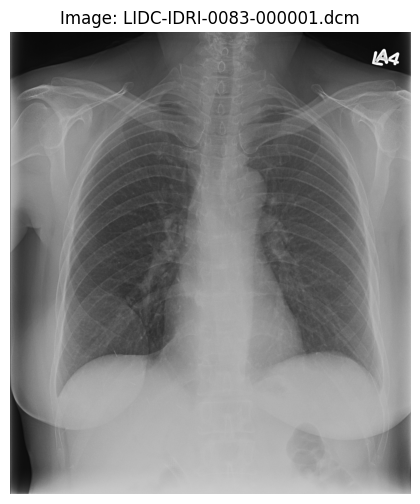

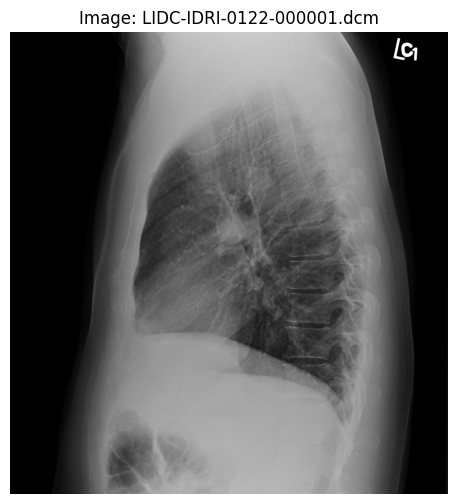

In [41]:
import pydicom
import matplotlib.pyplot as plt

def show_dicom(image_path):
    """Loads and displays a DICOM image."""
    dicom = pydicom.dcmread(image_path)  # Read DICOM file
    image = dicom.pixel_array  # Extract image data
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap="gray")  # Display in grayscale
    plt.title(f"Image: {image_path.split('/')[-1]}")
    plt.axis("off")  # Hide axes
    plt.show()

# Display the two sample images
sample_image = "C:/Users/user/Desktop/SDP/images/images/LIDC-IDRI-0083-000001.dcm"
sample_image1 = "C:/Users/user/Desktop/SDP/images/images/LIDC-IDRI-0122-000001.dcm"

show_dicom(sample_image)
show_dicom(sample_image1)


In [42]:
def predict_nodule(image_path):
    img = load_dicom_as_array(image_path)
    img = np.expand_dims(img, axis=0)  # Reshape for model input
    prediction = model.predict(img)
    return "Nodule Detected" if prediction[0][0] > 0.5 else "No Nodule Detected"

sample_image = "C:/Users/user/Desktop/SDP/images/images/LIDC-IDRI-0083-000001.dcm"
sample_image1= "C:/Users/user/Desktop/SDP/images/images/LIDC-IDRI-0122-000001.dcm"

print(predict_nodule(sample_image))
print(predict_nodule(sample_image1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Nodule Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
No Nodule Detected


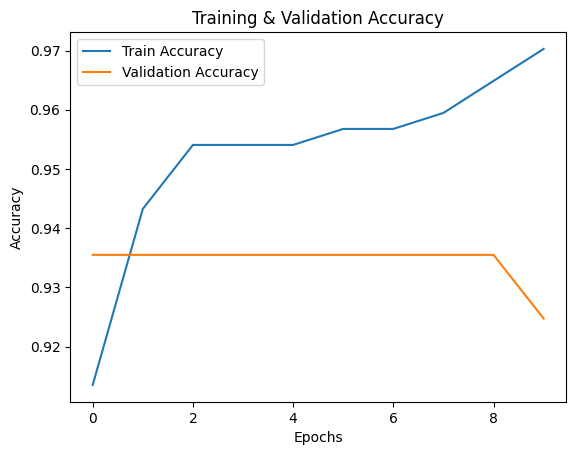

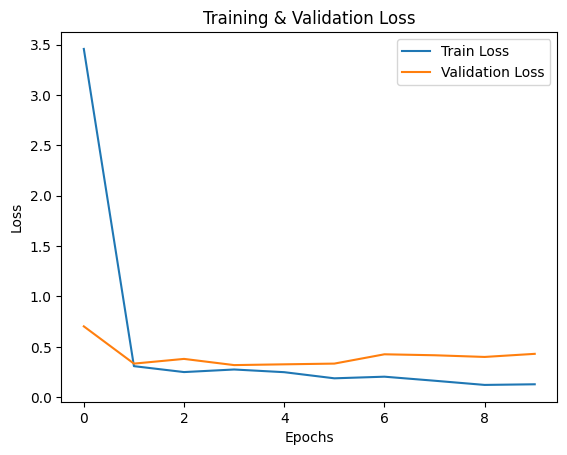

In [43]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

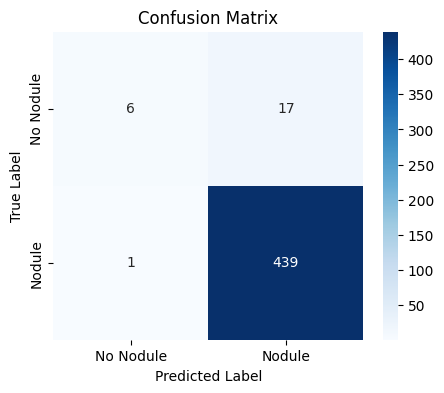

In [44]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pydicom
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#  Load & preprocess DICOM images
def load_dicom_as_array(dicom_path):
    dicom_data = pydicom.dcmread(dicom_path)
    image = dicom_data.pixel_array
    image = cv2.resize(image, (224, 224))  # Resize for model
    image = image / 255.0  # Normalize
    return image

def predict_nodule(image_path):
    img = load_dicom_as_array(image_path)  # Load & preprocess image
    img = np.expand_dims(img, axis=0)  # Reshape for model input
    prediction = model.predict(img)
    return 1 if prediction[0][0] > 0.5 else 0  # Convert probability to binary label

#  Load entire dataset metadata
metadata = pd.read_csv("C:/Users/user/Desktop/SDP/lidc_metadata.csv")

# Map labels: Nodules = 1, None = 0
metadata["label"] = metadata["findings"].apply(lambda x: 1 if x == "Nodules" else 0)

test_images = []
y_true = []

for _, row in metadata.iterrows():
    image_path = f"C:/Users/user/Desktop/SDP/images/images/{row['image_id']}.dcm"
    if os.path.exists(image_path):
        test_images.append(image_path)
        y_true.append(row["label"])  # Store true labels

# 🚀 Predict on the entire dataset
y_pred = [predict_nodule(img) for img in test_images]

# ✅ Calculate Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n🎯 **Model Performance Metrics on Full Dataset**")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1-score:  {f1:.4f}")

# 🔍 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Nodule", "Nodule"], yticklabels=["No Nodule", "Nodule"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split